# 1. 계산 그래프
계산 그래프는 계산 과정을 그래프로 나타낸 것이다.
복수의 Node와 Edge로 표현됨.

## 1-1. 계산 그래프로 풀기
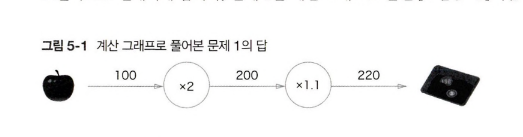

계산 그래프를 이용한 문제 풀이는 
1. 계산 그래프 구성
2. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행(이 과정을 `순전파(propagation)`라고 한다)

반대로 오른쪽에서 왼쪽으로 진행되는 것을 `역전파(backward propagation)`라고 한다.

## 1-2. 국소적 계산
계산 그래프의 특징은 국소적 계산을 전파함으로써 최종 결과를 얻는 것
`국소적 계산`: 각 단계에서는 해당 노드의 계산만 한다.

## 1-3. 왜 계산 그래프로 푸는가?
이점: 
- `국소적 계산`-> 전체가 아무리 복잡해도 각 노드에서는 단순한 계산에 집중하여 문제를 단순화 가능 
- **역전파를 통해 `미분`을 효율적으로 계산 가능** 
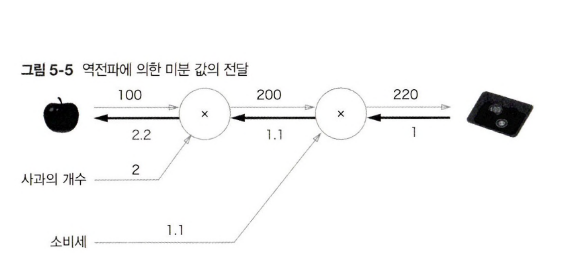
    - 위 그림처럼 역전파에 의해 미분 구하기 가능   
    - 그림에서 굵은 반대 방향 화살표 선이 역전파 과정   
    - 정리하자면, 사과 가격과 같은 값을 역전파 과정에 의해 쉽게 푸는 게 가능하다는 말

 # 2. 연쇄법칙(chain rule)
 - `역전파`에서 `국소적 미분`을 전달하는 원리는 `연쇄법칙`에 의한 것이다.
 - 이 장에서는 연쇄법칙이 계산 그래프 상의 역전파와 같다는 사실을 밝힘   

## 2-1. 계산 그래프의 역전파
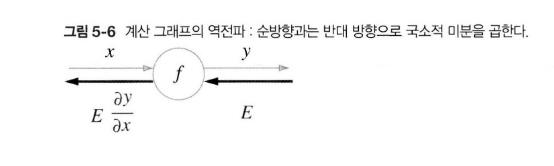

위 사진은 $y = f(x)$라는 계산의 역전파를 나타낸 것.

절차:
- 신호 E에 노드의 `국소적 미분` $\frac{\partial y}{\partial x}$을 곱함
- 다음 노드로 전달

`국소적 미분`: 
- 순전파 때의 $y = f(x)$ 계산의 미분을 구하기.
- 즉, x에 대한 y의 derivaitve $\frac{\partial y}{\partial x}$를 구한다는 뜻

## 2-2. 연쇄법칙(chain rule)
여기서 소개하는 chain rule 자체는 고등학교 수학에 나오는 부분과 같은 합성함수 미분 내용이니 pass   

## 2-3. 연쇄법칙과 계산 그래프(chain rule and computational graph)
chain rule을 계산 그래프로 나타낼 수 있다.
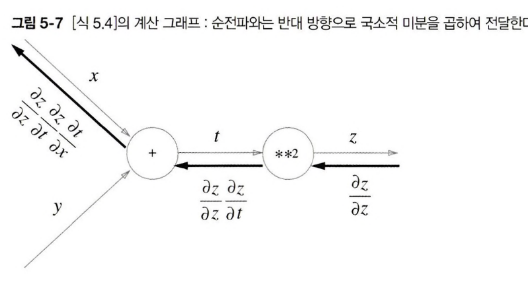
책에서는 복잡하게 나와있는데 별거없다.   
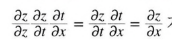
$$\frac{\partial z}{\partial x}$$
결론적으로 x에 대한 z의 미분이 된다는건데, 그냥 이게 역전파 == 연쇄법칙   원리가 같다는 말임.
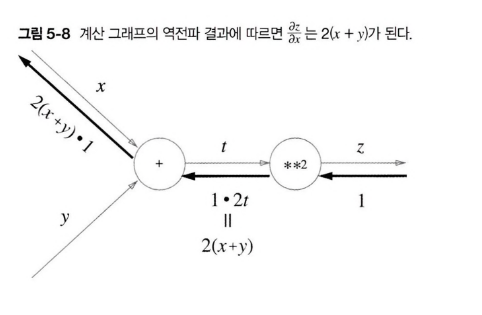
그렇다고 한다.

# 3. 역전파

## 3-1. 덧셈 노드의 역전파
덧셈 노드 예시로 $z = x + y$라는 식을 살펴보자.   
$$\frac{\partial z}{\partial x} = 1$$
$$\frac{\partial z}{\partial y} = 1$$
다 1이군. 그렇다.    
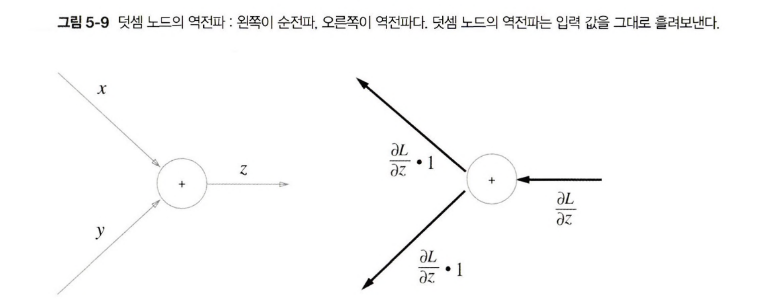
1이니까 그냥 들어간 걸 그대로 뱉을 것이다.   
$$\frac{\partial L}{\partial z}$$ 라고 했다.  
L은 어디서 튀어나온 놈인가 할 수 있는데, L이 최종 값인 것이다. 우리는 전체 계산의 일부만 보고 있지만, z가 다는 아니다.
## 3-2. 곱셉 노드의 역전파
$z = xy$를 생각해보자.
$$\frac{\partial z}{\partial x} = y$$
$$\frac{\partial z}{\partial y} = x$$
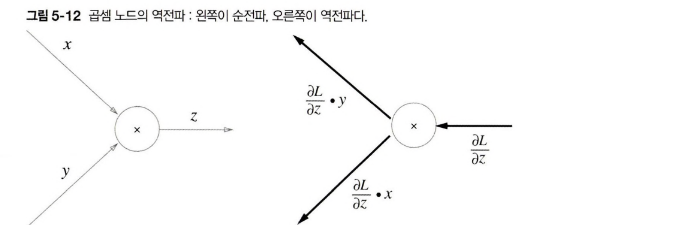
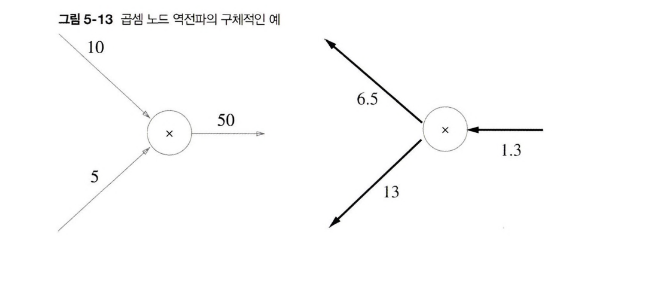
저 경우도 복잡할 게 없다. 반대 방향으로 곱해지면 될 뿐임. 대신 덧셈은 들어온 걸 그대로 뱉으니 순방향 입력 신호가 필요가 없었다만 곱셈은 한 번 곱하긴 해야하므로 필요하다. 저 경우 5, 10 이런 친구들이 곱해지는데 이것들이 필요하다는 말.
## 3-3. 다시 나타난 사과 쇼핑
이 책은 자꾸 사과 쇼핑 예시를 들고 있다. 문제를 정의하면   
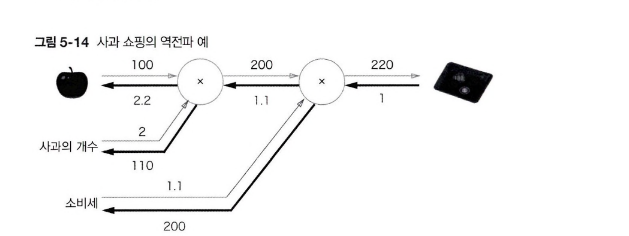   
변수: 사과 가격, 사과 개수, 소비세   
결과 해석:   
- derivative: 사과 가격->2.2, 사과 개수->110, 소비세->200
- if (소비세, 사과 가격 같은 양 상승)    
    최종 금액<-소비세가 200(unit: 100%), 사과 가격이 2.2크기(unit: 1원)로 영향을 줌
사과와 귤 역전파 예시도 있는데
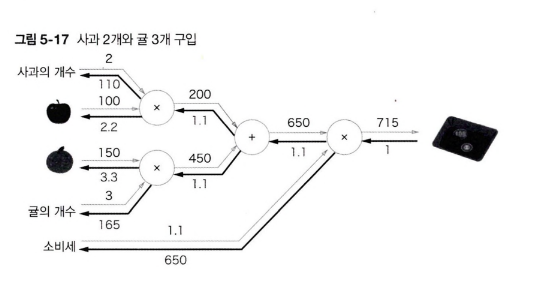
그냥 이게 정답

# 4. 단순한 계층 구현하기

## 4-1. 곱셈 계층
Implemented in `MulLayer` Class

In [1]:
# Implementation of Multiplication Layer
class MulLayer:
    def __init__(self):
        # Initialize instance variable x, y
        self.x = None
        self.y = None

    def forward(self, x, y):
        # returns multiplication of x y
        self.x = x
        self.y = y
        out = x + y
        return out

    def backward(self, dout):
        # Swap x and y, multiplicate
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy

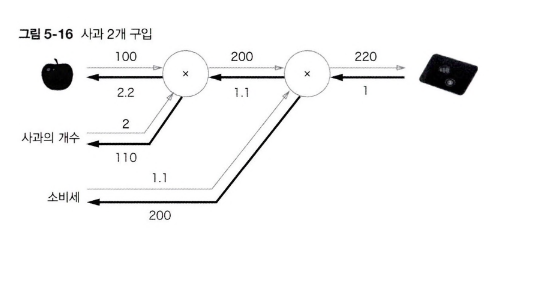
위 케이스 적용하면

In [8]:
apple = 100
apple_num = 2
tax = 1.1

# Layers
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# Forward Propagation
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)
print(f"Price: {price}")

# Backward Propagation
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
print(f"Dapple: {dapple}, Dapple_num: {dapple_num}, Dtax: {dtax}")

Price: 103.1
Dapple: 2.2, Dapple_num: 110.00000000000001, Dtax: 102


## 4-2. 덧셈 계층
Implemented in AddLayer

In [10]:
# Addition Layer
class AddLayer:
    def __init__(self):
        # Nothing to do...Initialization is not required in addition
        pass
        
    def forward(self, x, y):
        # simple addition
        out = x + y
        return out

    def backward(self, dout):
        # Actually, just returns dout
        dx = dout * 1
        dy = dout * 1
        return dx, dy

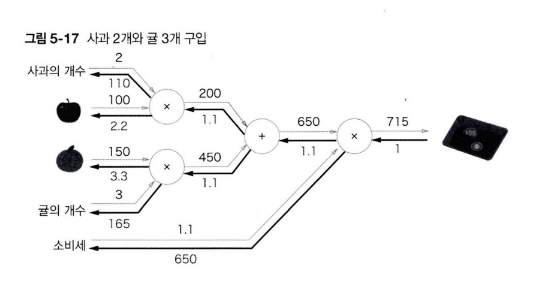   
~~그림 재탕~~   
그럼 이 계산도 넣어보자.

In [15]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# Layers
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# Forward Propagation
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

# Backward Propagation
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(f"Price {price}")
print(f"Dapple_num: {dapple_num}, Dorange: {dorange}, Dorange_num: {dorange_num}, Dtax: {dtax}")

Price 256.1
Dapple_num: 110.00000000000001, Dorange: 3.3000000000000003, Dorange_num: 165.0, Dtax: 255


# 5. 활성화 함수 계층 구현하기
이제 계산 그래프를 신경망에 적용할 차례다.

## 5-1. ReLU 계층
$$y = \left\{\begin{matrix}
 x (x > 0)
\\ 0 (x\leq 0)
\end{matrix}\right.$$
$$\frac{\partial y}{\partial x} = \begin{Bmatrix}
 1 (x > 0)\\ 0 (x \leq 0)
\end{Bmatrix}$$
derivative가 조건에 따라 1 또는 0이 되는데 순전파 때 입력인 x가 0보다 크면 역전파는 먹은 인풋을 그대로 뱉는다. 그러나 0 이하면 신호를 보내지 않는다.   
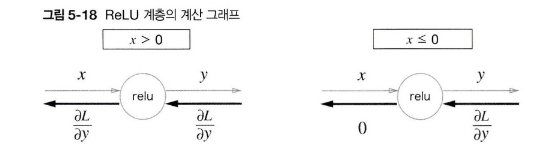


In [16]:
# Computational Graph to Relu
class Relu:
    def __init__(self):
        # Mask: True/False numpy array
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

In [18]:
import numpy as np
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
mask = (x <= 0)
print(mask)

[[False  True]
 [ True False]]


## 5-2. Sigmoid
$$y = \frac{1}{1+exp(-x)}$$   
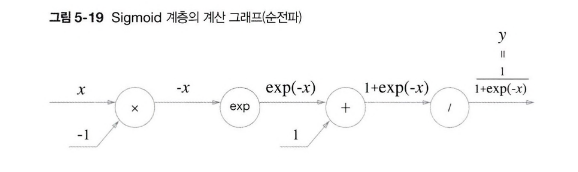   
여기서 역전파의 흐름을 짚어보면,      

### 1단계
`/노드`: $y = \frac{1}{x}$의 미분값   
$$\frac{\partial y}{\partial x} = -\frac{1}{x^2} = -y^2$$   
역전파 때 상류에서 흘러온 값에 `$-y^2$`(순전파의 출력을 제곱한 후 마이너스를 붙인 값)을 곱해서 하류로 전달함.   
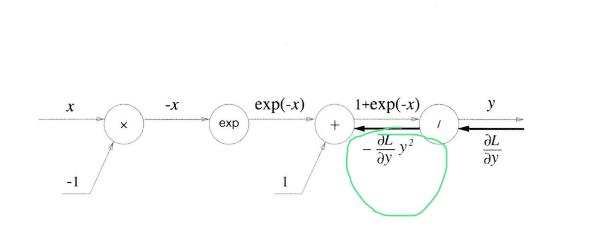    

### 2단계
`+노드`는 전에도 말했지만 먹은 걸 그대로 토해낸다고 했다.   
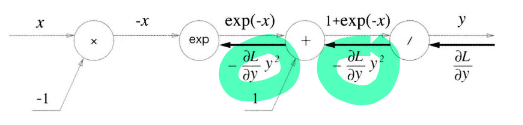   

### 3단계
`exp 노드`는 exp계산을 할테니
$$\frac{\partial y}{\partial x} = exp(x)$$
로 derivative가 던져질 것.   
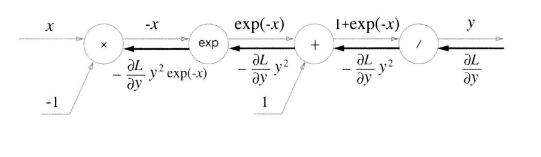   

### 4단계
`x 노드` 그냥 순전파 때 값 바꿔곱하기   
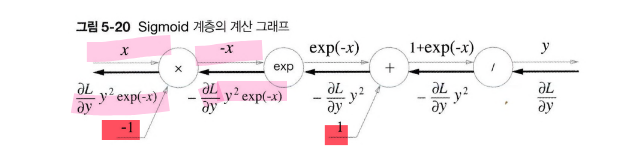   
-1 곱하면 끝

### 결론
그런데 저 과정은 그냥 이 그림 하나로 대체될 수 있다.   
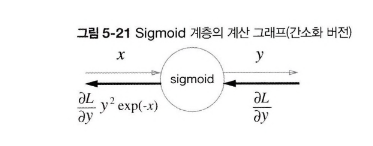   
어차피 저 4단계 과정들은 시그모이드를 쪼개서 쓴거다(사실 쪼개서 쓴 것은 아니고 저 과정을 통해 시그모이드가 되는거겠다만)   
어째거나 노드 하나로 해결이 된다는 것.   

사실 좀 더 정리해볼 수 있다.
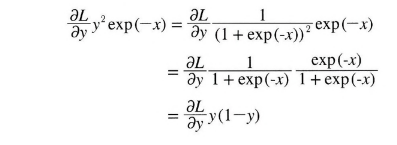   
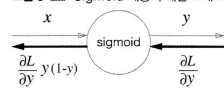   
같은 내용이지만, 좀 더 보기 좋아졌다!   
구현은 어렵지 않다. ~~넘파이를 숭배하도록 하자~~

In [21]:
# Sigmoid
class Sigmoid:
    def __init__(self):
        # out:saves forward propagation's output
        self.out = None

    def forward(self, x):
        # computation of out
        out = 1 / (1 + np.exp(-x))
        self.out = out

    def backward(self, dout):
        # uses saved value out
        dx = dout * (1.0 - self.out) * self.out
        return dx

# 6. Affine/Softmax 계층 구현하기

## 6-1. Affine 계층
- 어파인 변환(affine transformation): 신경망 순전파 때 수행하는 행렬의 곱
- 이러한 변환을 수행하는 계층을 Affine 계층이라고 한다(이 책에서는)

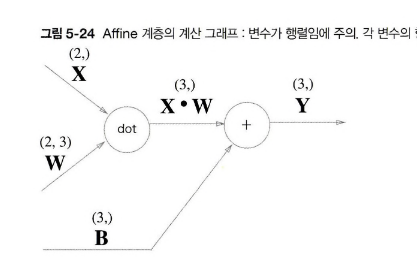

그림은 단순한 계산 그래프를 보여주고 있는데, 결과적으로 Affine계층은 스칼라값 대신 행렬이 들어가는 것이 차이점이다.   
행렬을 사용해도 행렬의 원소마다 전개하면 스칼라값으로 했던 것처럼 유도된다.
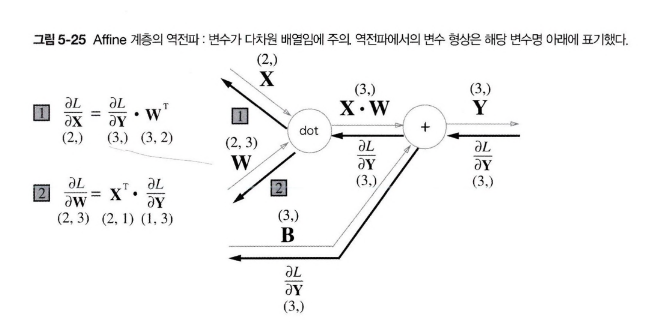   
Affine에서는 행렬의 형상이 중요하게 이용되는데, 행렬의 곱에서 차원을 맞춰주었던 것과 같은 논리다.   
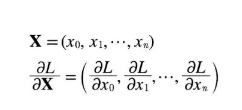
그러나 이놈들은 형상(shape)이 같다.
## 6-2. 배치용 Affine 계층
- 위의 Affine계층은 입력 데이터로 X 하나만 있을 때의 상황인데, 데이터 N개를 묶어 순전파하는 것을 `배치용 Affine 계층`이라 한다.   
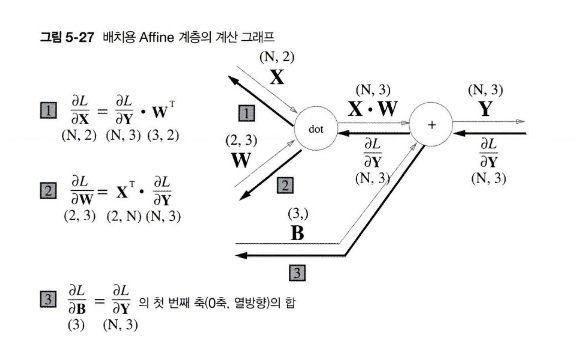
다른 점은 그냥 X의 형상이 (2, )에서 (N, 2)가 된 것 뿐이다.


In [1]:
# Affine Layer
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dw = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.db = np.sum(dout, axis = 0)
        return dx

## 6-3. Softmax-with-Loss Layer
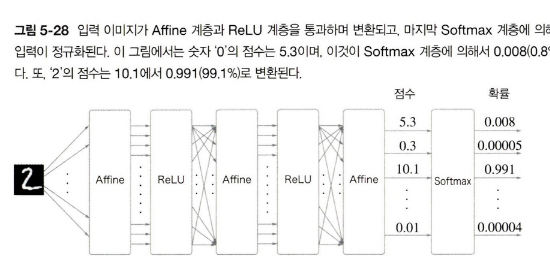   
사진은 Softmax계층의 출력을 나타낸 것이다.  
입력값을 출력의 합이 1이 되도록 출력하는 것.   
책에서는 Loss function인 교차 엔트로피 오차도 포함해서 Softmax-with-Loss계층을 구현한다.   
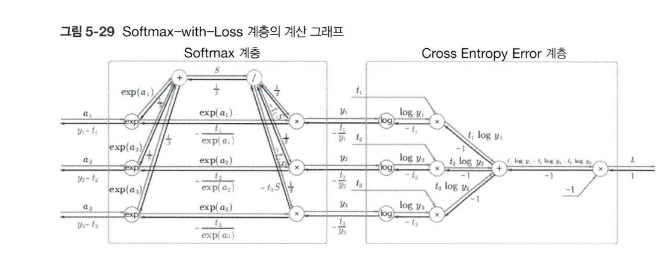   
계산 그래프가 상당히 어지럽다. 그렇지만 이대로 할 건 아니고   
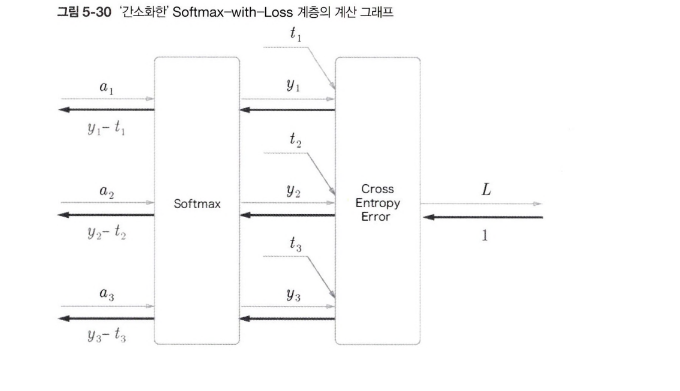   
와 같이 간소화할 수 있다.   
이를 정리하면

- 3 클래스 분류 가정
- 소프트맥스 함수는 Softmax 계층, 교차 엔트로피 오차는 Cross Entropy Error 계층으로 표기
- 이전 계층에서 3개의 입력을 받음->Softmax Layer: 입력 ($a_{1}, a_{2}, a_{3}$) 를 정규화 -> 출력: ($y_{1}, y_{2}, y_{3}$) -> Cross Entropy Error Layer: Softmax의 출력과 정답 레이블을 받아서 손실 L 출력.


In [3]:
import numpy as np

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.num(exp_x, axis=-1, keepdims=True)

def cross_entropy_error(y, t):
    if y.ncdim == 1:
        t = t.reshape(1, -1)  
        y = y.reshape(1, -1)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size  
        
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.x - self.t) / batch_size
        return dx

# 7. 오차역전파법 구현하기

## 7-1. 신경망 학습의 전체 그림

신경망 학습의 순서는 다음과 같다.   
전제: 신경망에는 적응 가능한 가중치와 편향이 있고 이들을 훈련 데이터에 적응하도록 조정하는 과정을 `학습`이라 함.   
1. 미니배치   훈련 데이터 중 일부를 무작위 추출. 이 추출된 데이터가 `미니배치`. 여기서 목표는 미니배치 손실함수 값 줄이기.
2. 기울기 산출   손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구함. 당연하지만 손실함수를 최소화하도록 제시해야겠고
3. 매개변수 갱신   가중치 매개변수를 기울기 방향으로 조금 갱신
4. 1-3 반복.

여기서 오차역전파법은 `기울기 산출` 단계에서 사용. 

## 7-2. 오차역전파법을 적용한 신경망 구현하기

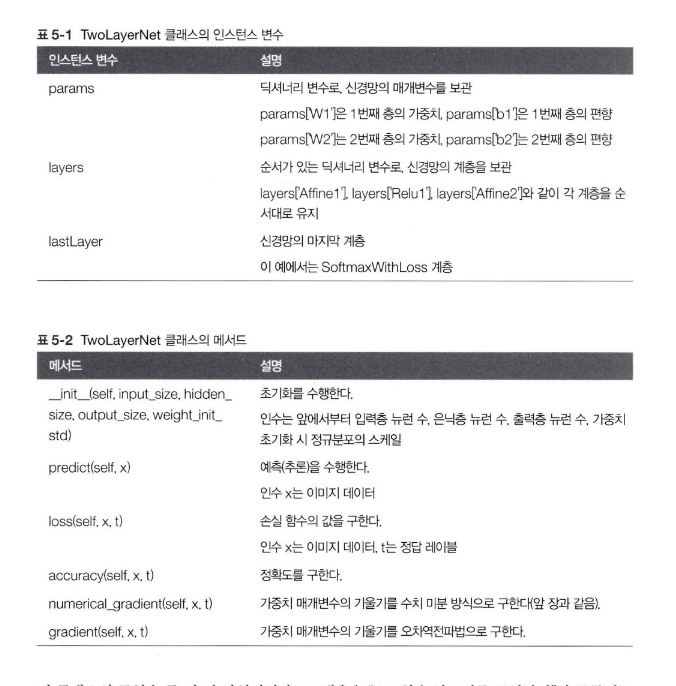

중요한 점은 계층을 사용하여 predict()와 gradient() 계층의 전파만으로 동작이 이루어지는 것이다.

## 7-3. 오차역전파법으로 구한 기울기 검증하기
수치 미분은 느리다. 대신 오차역전파법을 사용하면 빠르다.   
그렇지만 오차역전파법은 속도를 위해 단순함을 희생한 대가로 버그를 만들 수 있다.   그래서 느린 수치 미분을 다시 사용하여 오차역전파법을 맞게 사용했는지 검증할 수 있는것.

## 7-4. 오차역전파법을 사용한 학습 구현하기
그냥 기울기를 오차역전파법으로 구한다는 것